In [153]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

داده‌های ورودی از فایل‌ها.

In [154]:
def open_file(i):
    # Open input file
    if (i == 1):
        infile = open('gr229.tsp', 'r')
        # Read instance header for the gr229
        Name = infile.readline().strip().split()[1] # NAME
        FileType = infile.readline().strip().split()[1] # TYPE
        Comment = infile.readline().strip().split()[1] # COMMENT
        Dimension = infile.readline().strip().split()[1] # DIMENSION
        EdgeWeightType = infile.readline().strip().split()[1] # EDGE_WEIGHT_TYPE
        DIsplayDataType = infile.readline().strip().split()[1] # DISPLAY_DATA_TYPE
        infile.readline()
    else:
        infile = open('pr1002.tsp', 'r')
        # Read instance header for the pr1002
        Name = infile.readline().strip().split()[2] # NAME
        Comment = infile.readline().strip().split()[2] # COMMENT
        FileType = infile.readline().strip().split()[2] # TYPE
        Dimension = infile.readline().strip().split()[2] # DIMENSION
        EdgeWeightType = infile.readline().strip().split()[2] # EDGE_WEIGHT_TYPE
        infile.readline()

    # Read node list
    nodelist = []
    N = int(Dimension)
    for i in range(N):
        x ,y = infile.readline().strip().split(' ')[1:]
        nodelist.append([float(x), float(y)])
        
    cor = np.array(nodelist)

    # Close input file
    infile.close()
    return N, cor

تابع محاسبه هزینه که برابر فاصله شهر‌ها از یکدیگر است.

In [155]:
def calculate_cost(cor):
    fit = 0
    for i in range(len(cor)-1):
        fit += math.sqrt((cor[i][0] - cor[i+1][0])**2 + (cor[i][1] - cor[i+1][1])**2)
    fit += math.sqrt((cor[0][0] - cor[-1][0])**2 + (cor[0][1] - cor[-1][1])**2)
    return fit

محاسبه همسایگی مانند مسئله stock

In [156]:
def neighbor(orders, temperature):
    new_orders = orders.copy()
    i = random.randint(0, len(orders) - 1)
    j = random.randint(0, len(orders) - 1)
    
    temp = new_orders[i].copy()
    new_orders[i] = new_orders[j].copy()
    new_orders[j] = temp.copy()
    
    cost = calculate_cost(orders)
    new_cost = calculate_cost(new_orders)
    
    rand = random.random()
    if (new_cost < cost):
        orders = new_orders
        return orders
    
    elif (rand < math.exp((cost - new_cost)/temperature)):
        orders = new_orders
    
    return orders

In [157]:
def simulated_annealing(temperature, alpha, TL, i):
    N, cor = open_file(i)
    
    requests = np.random.permutation(cor)
    
    best_order = []
    least_cost = np.Inf
    costs = []
    best_costs = []
    iteration = 0
    while(temperature > 0.1):
        for i in range(TL):
            iteration += 1
            cor = neighbor(cor, temperature)
            
            if (calculate_cost(cor) < least_cost):
                best_order = cor
                least_cost = calculate_cost(cor)
                
            costs.append(calculate_cost(cor))
            best_costs.append(least_cost)
        temperature *= alpha
        
    return best_order, least_cost, costs, best_costs, iteration

[[  59.55   30.15]
 [  64.34   40.32]
 [  68.58   33.05]
 [  59.25   24.45]
 [  56.57   24.06]
 [  54.43   20.3 ]
 [  54.41   25.19]
 [  53.54   27.34]
 [  49.5    24.  ]
 [  46.28   30.44]
 [  50.26   30.31]
 [  55.45   37.35]
 [  56.2    44.  ]
 [  55.45   49.08]
 [  53.12   50.09]
 [  51.4    39.1 ]
 [  50.     36.15]
 [  48.27   34.59]
 [  44.36   33.32]
 [  47.14   39.42]
 [  48.44   44.25]
 [  46.21   48.03]
 [  41.43   44.49]
 [  40.11   44.3 ]
 [  40.23   49.51]
 [  58.     56.15]
 [  56.51   60.36]
 [  67.27   63.58]
 [  55.     73.24]
 [  49.5    73.1 ]
 [  55.02   82.55]
 [  69.2    88.06]
 [  56.01   92.5 ]
 [  43.15   76.57]
 [  41.2    69.18]
 [  39.4    66.48]
 [  38.35   68.48]
 [  43.48   87.35]
 [  52.16  104.2 ]
 [  47.55  106.53]
 [  52.03  113.3 ]
 [  62.13  129.49]
 [  59.34  150.48]
 [  64.45  177.29]
 [  53.01  158.39]
 [  46.58  142.42]
 [  50.35  137.02]
 [  48.27  135.06]
 [  43.1   131.56]
 [  50.17  127.32]
 [  39.56   32.52]
 [  41.01   28.58]
 [  38.25   

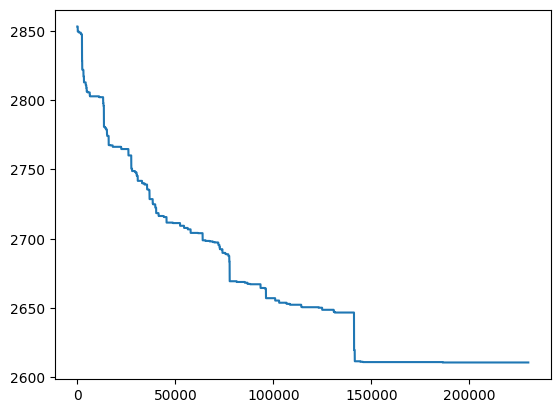

In [160]:
order, least, costs, best_costs, it = simulated_annealing(1, 0.99, 1000, 1) #input = gr229.tsp
print(order)
print(least)
plt.plot([i+1 for i in range(it)], best_costs)
plt.show()

[[ 1150.  4000.]
 [ 1050.  2750.]
 [ 1150.  2250.]
 ...
 [14550.  5750.]
 [14550.  8450.]
 [14550. 11650.]]
347427.5399413118


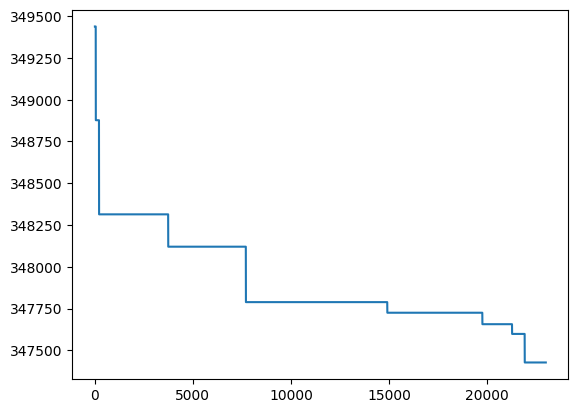

In [179]:
order, least, costs, best_costs, it = simulated_annealing(1, 0.99, 100, 2) #input = pr1002.tsp
print(order)
print(least)
plt.plot([i+1 for i in range(it)], best_costs)
plt.show()

این سلول برای این است که از صحیح بودن پاسخ، اطمینان حاصل کنیم.

In [180]:
for i in range(len(order)):
    for j in range(len(order)):
        if (order[i][0] == order[j][0] and order[i][1] == order[j][1] and i!=j):
            print('hi')

gr229 = 2610

pr1002 = 347427